# Smart building modeling
Marie HALLING  
Simon WEIDESKOG  
Louise CALMERED  
Supervised by Christian Ghiaus  

2022-06-06

## Table of contents
![toc.png](Figures/toc.png)


## Introduction
The growing population and the people’s way of living today has increased the use of energy all over the world. Energy consumption has several environmental impacts such as the contribution to global warming, the depletion of the ozone layer and the reduction of biodiversity which is why the human’s high energy consumption must stop and start to decrease instead. Globally, the three major sectors contributing mostly to energy usage are industrial, transportation and buildings where buildings, including both residential and commercial, have the highest energy demand. Buildings have exceeded the other sectors and are now standing for between 20% and 40% of the energy use in developed countries. The reason for this is an increase in population, a higher demand for comfort and a rise of the time spent inside buildings. Therefore, not only must the energy consumption decrease but the energy efficiency must also increase (Lombard, Ortiz & Pout, 2007). 
 
A first step to increase the energy efficiency is to investigate the energy consumed inside buildings and map out the different sources of energy use. This can be done by simulations that represent a virtual model of the real world. To be able to make a good virtual model, the simulations should include as many parameters as possible, for example the geometry of the building, the specifications of the systems for heating, cooling and ventilation and the schedules for operating the devices. The results achieved from a simulation shows the energy- and mass flows within a building and could thus help adding measurements to improve the overall energy efficiency.

### Aim of the study
The aim of the study presented in this report was to construct a model of a building with at least two rooms and simulate energy- and mass flows by using relevant inputs and outputs within that building. Further, the aim is to study how the inside temperature is dependent on the temperatures and weather outside of the apartment. To be able to answer this, a simulation has been implemented in PYTHON in steady-state and in transient state, where the fluctuating weather data also has been taken into account for the latter. Also, the goal was to optimize the simulation by using a controller. 

### Hypothesis
To facilitate the simulation, the model has been made very simple in terms of the material and layers in the wall. The heat sources are few and the ventilation system has been neglected. Thus, the temperature in the modeled apartment can be seen as a closed system which is why the heat flows from the apartments and the hallway surrounding the apartment are neglected. The surface of the different studied objects are assumed to be uniform. The heat exchange through each wall is calculated as a union and therefore one-dimensional methods have been applied. 
The solar radiation is distributed in the room with diffusion. Finally, all heat transfers are seen as linear due to small differences in temperature.  

The simulated weather data is taken from Lyon five days in the beginning of January 2000. Five days were taken to make sure the system would stabilize and reach steady-state. Hence the temperature and the incoming solar radiation are based on the weather forecast site ClimateOneBuilding.org.
The internal heat sources in the bathroom and in the main room are seen as constante heat sources, which means the flow from the heat source remains the same no matter the time of the day. This is to facilitate the calculation for the simulation. 

## Methodology
Here is the methodology presented.

### Building plan (FIXA FIGURNYMMER)
The modeled room is a small apartment with one room and a bathroom. One wall separates the room from the outside and the others to other rooms, such as the bathroom, nearby apartments and the hallway. Depending on the placement, the walls consist of different layers. The dimensions and properties of each wall are compiled in the appendix A. The outer wall consists of an external layer of insulation and an internal layer of brick. The position of the outer wall can be seen to the right in the main illustration of the room, in figure 1, and the cross section of the outer wall is illustrated in figure 2. The inner walls consist of only one layer of brick and is illustrated in figure 3.

An illustration of the model can be seen in figure 1 below where the nearby apartments are above and below the studied room. The hallway is situated to the left and the outside to the right.

![fig1.png](Figures/fig1.png)

![fig2.png](Figures/fig2.png)

![fig3.png](Figures/fig3.png)

The studied model has two rooms with the dimensions presented in table 1.

![tab1.png](Figures/tab1.png)


### Thermal model
The thermal model is based on the fundamental principles of thermodynamics.

Every heat flow in the modeled room has been split into nodes and branches to represent the resistance through the wall (R), the source of energy to the system (f), temperature nodes (q) and the residual heat in a material (C). 

An illustration of the nodes can be seen in the figure 4.

![fig4.png](Figures/fig4.png)


### Mathematical model
#### Equations
To understand how the model works, some equations concerning the fundamentals of thermodynamics are presented in the following section. 

The simulated conductions through the wall in the model are divided for each layer. This means that there is one node for each material in the wall. The conduction can be calculated with the following equation:

$$q=-\frac{k}{dx}(T_2-T_1)$$

where $k$ is the thermal conductivity of the material (W/m2), $T_2$ is the temperature on one side of the layer (K) and $T_1$ is the temperature on the other side of the layer (K).
    
The resistance value for conduction is

$$R=\frac{t}{\lambda \cdot A}=\frac{t}{\lambda \cdot A}$$

where,  
$t$ = thickness (m) of the wall,  
$\lambda$ = heat conductivity of the material (W/mK),  
$A$ = area of the wall (m2). 
    
The convection from the solids to the fluids have been calculated with the following equation:

$$q=h_c(T_s-T_\infty)$$

where,  
$h_c$ = heat transfer coefficient (W/m2K)  
$T_s$ = temperature on the surface (K)  
$T_\infty$ = surrounding temperature (K).
    
The resistance value for convection is

$$R=\frac{1}{h \cdot A}=\frac{1}{G}$$

where,  
$A$ = is the area (m2)  
$h$ = heat transfer coefficient (W/m2K) for the outside respectively the inside of the wall.
    
The U-value is 

$$U=\frac{1}{R_{tot}}$$

The different layers and material in the window have been calculated as one unit based on the product's information. The heat transferred through the window is therefore calculated as a series of units with a given U-value such as the equation below. 

$$Q=U \cdot A \cdot \Delta T$$

where,  
$Q_4$ = heat transfer rate, W=J/s  
$A$ = heat transfer surface area, m2  
$U$ = overall heat transfer coefficient, W/(m2°C)  
$\Delta T$ = Mean temperature difference, °C.

The capacities are calculated as

$$C=\rho \cdot c \cdot t \cdot A$$

where, 
    $\rho$ = is the density of the material (kg/m3), 
    $c$ = is the specific heat capacity of the material (J/kgK), 
    $t$ = is the thickness of the layer (m) 
    $A$ = is the area (m2). 

The values for the density, the specific heat capacity, the heat conductivity, the thickness and the area for the material and layers for the walls in the building can be found in Appendix A.

#### Parameters
The used matrices for the simulation are presented in the table 2. This is followed by the variables name and their respective values.

![tab2.png](Figures/tab2.png)
![tab3.png](Figures/tab3.png)
![tab4.png](Figures/tab4.png)
![tab5.png](Figures/tab5.png)

To implement the material properties in the simulation the following values in table 6 have been calculated.

![tab6.png](Figures/tab6.png)

The following differential algebraic equations model can be made out of the explained matrices

$$C\dot{\theta}=-A^TGA\theta+A^TGb+f$$

### Model implementation in Python
#### Steady state
To implement the model in Python, the matrices were written and assigned to variables in the code. With the help of the code, the node temperature, as well as the indoor temperature, was calculated. The code is shown in its entirety below.

In [1]:
import numpy as np

# Room dimensions
ROOF_HEIGHT = 2.5
WINDOW_AREA = 2*1.5
APT_LENGTH = 5
APT_WIDTH = 4
BATHROOM_WIDTH = 2
BATHROOM_LENGTH = 2
RADIATOR_AREA = 2*0.5
DOOR_AREA = 2*0.6

# Wall thicknesses
INSULATION_THICKNESS = 0.1
OUTER_BRICK_WALL_THICKNESS = 0.15
HALL_BRICK_WALL_THICKNESS = 0.15
BATHROOM_BRICK_WALL_THICKNESS = 0.1

τ_gSW = 0.83    # short wave glass transmitance (glass)

# --------  A-MATRIX -----------
# ------------------------------
A = np.zeros([16, 10]) #create an matrix with zeros
# adds values for the ones /= 0
A[0, 0] = 1
A[1, 0], A[1, 1] = -1, 1
A[2, 1], A[2, 2] = -1, 1
A[3, 2], A[3, 3] = -1, 1
A[4, 3], A[4, 4] = -1, 1
A[5, 4], A[5, 5] = -1, 1
A[6, 5] = 1
A[7, 5] = 1
A[8, 5], A[8, 6] = 1,-1
A[9, 6], A[9, 7] = -1, 1
A[10, 5], A[10, 7]  = 1, -1
A[11, 8] = 1
A[12, 6], A[12, 8]  = 1, -1
A[13, 9] = 1
A[14, 5], A[14, 9]  = 1, -1
A[15, 5] = 1

# --------  G-MATRIX -----------
# ------------------------------
h_brick_air = 53.44 # Taken from previous work on wall construction
h_ins_air = 1.46 # Taken from previous work on wall construction
k_ins = 0.04 # Expanded polystyrene
k_brick = 0.6

conv_outer_wall = h_ins_air*(APT_WIDTH*ROOF_HEIGHT-WINDOW_AREA)
cond_ins = k_ins*(APT_WIDTH*ROOF_HEIGHT-WINDOW_AREA)/(INSULATION_THICKNESS/2)
cond_brick_out = k_brick*(APT_WIDTH*ROOF_HEIGHT-WINDOW_AREA)/(OUTER_BRICK_WALL_THICKNESS/2)
conv_inner_wall = h_brick_air*(APT_WIDTH*ROOF_HEIGHT-WINDOW_AREA)
conductivity_window = 1.2*WINDOW_AREA # https://aspirebifolds.co.uk/2018/03/what-are-typical-u-values-on-windows-and-doors/
conv_radiator = 10*RADIATOR_AREA
conductivity_bath_door = 1.06*DOOR_AREA # chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://millpanel.com/_file/159/u-values_uk.pdf
conductivity_bath_wall = k_brick*((BATHROOM_WIDTH+BATHROOM_LENGTH)*ROOF_HEIGHT-DOOR_AREA)/(BATHROOM_BRICK_WALL_THICKNESS/2)
conductivity_hall_bathroom_wall = k_brick*(BATHROOM_WIDTH*ROOF_HEIGHT)/(HALL_BRICK_WALL_THICKNESS/2)
conductivity_hall_wall = k_brick*(BATHROOM_WIDTH*ROOF_HEIGHT-DOOR_AREA)/(HALL_BRICK_WALL_THICKNESS/2)
conductivity_hall_door = 1.06*DOOR_AREA

g=[None]*16
g[0]=conv_outer_wall
g[1]=cond_ins
g[2]=cond_ins
g[3]=cond_brick_out
g[4]=cond_brick_out
g[5]=conv_inner_wall
g[6]=conductivity_window
g[7]=conv_radiator
g[8]=conductivity_bath_door
g[9]=conductivity_bath_wall
g[10]=conductivity_bath_wall
g[11]=conductivity_hall_bathroom_wall
g[12]=conductivity_hall_bathroom_wall
g[13]=conductivity_hall_wall
g[14]=conductivity_hall_wall
g[15]=conductivity_hall_door

G = np.diag(g)

# --------  b-VECTOR -----------
# ------------------------------

T0 = 10
T_isp = 20
T_hall = 20

b = np.array([T0, 0, 0, 0, 0, 0, T0, T_isp, 0, 0, 0, T_hall, 0, T_hall, 0, T_hall])

# --------  f-VECTOR -----------
# ------------------------------

F0 = 50 * (APT_WIDTH*ROOF_HEIGHT-WINDOW_AREA) # Average during 24h
F1 = 50 * τ_gSW * WINDOW_AREA # https://www.engineeringtoolbox.com/radiant-heat-windows-d_1005.html
Q_a = 50
Q_b = 100

#f = [0]*10
f = np.array([F0, 0, 0, 0, F1, Q_a, Q_b, 0, 0, 0])

A_sys = np.transpose(A) @ G @ A # The A-matrix in the equation B = A*theta
B_sys = np.transpose(A) @ G @ b + f
theta = np.linalg.solve(A_sys,B_sys) # Solution of the differential equation system

print('Main room temp: '+str(theta[5]))
print('All temperatures: '+str(theta))

# --------  C-VECTOR -----------
# ------------------------------

c_ins = 850*22*INSULATION_THICKNESS*(ROOF_HEIGHT*APT_WIDTH-WINDOW_AREA)
c_wall = 900*2000*OUTER_BRICK_WALL_THICKNESS*(ROOF_HEIGHT*APT_WIDTH-WINDOW_AREA)
c_bathroom_to_room = 900*2000*BATHROOM_BRICK_WALL_THICKNESS*((BATHROOM_WIDTH+BATHROOM_LENGTH)*ROOF_HEIGHT-DOOR_AREA)
c_hall_bathroom = 900*2000*HALL_BRICK_WALL_THICKNESS*BATHROOM_WIDTH*ROOF_HEIGHT
c_hall_room = 900*2000*((APT_WIDTH-BATHROOM_WIDTH)*ROOF_HEIGHT-DOOR_AREA)*HALL_BRICK_WALL_THICKNESS
c_air_main_room = 1006*1.208*(APT_WIDTH*APT_LENGTH-BATHROOM_WIDTH*BATHROOM_LENGTH)*ROOF_HEIGHT
c_air_bathroom = 1006*1.208*(BATHROOM_WIDTH*BATHROOM_LENGTH*ROOF_HEIGHT)

C = np.array([0, c_ins, 0, c_wall, 0, c_air_main_room, c_air_bathroom, c_bathroom_to_room, c_hall_bathroom, c_hall_room])


Main room temp: 25.56693771898979
All temperatures: [40.60800821 33.9676232  27.32723819 26.66319969 25.99916119 25.56693772
 25.41386025 25.49039898 22.70693012 22.78346886]


#### Dynamic simulation
To account for the heat exchange and make the system adapt to the desired temperature in the main room, a controller is used. Our way to change the effect of the main room temperature is by using different values of Kp. The coefficient Kp is multiplied with the convection coefficient between the room and the radiator in the G-matrix, in order to mimic a temperature regulation of the radiator. The dynamic simulations are demonstrated in the code below.

Main room temp: 29.628747219456073
Max time step: 164.7147372376766


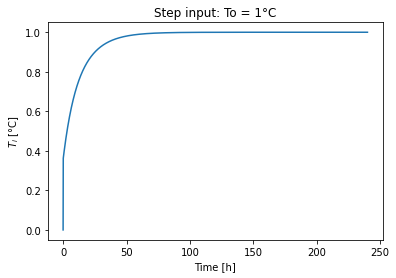

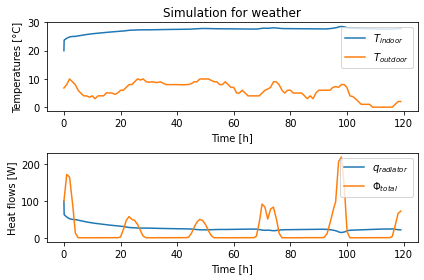

In [2]:
import numpy as np
import dm4bem
import matplotlib.pyplot as plt
import pandas as pd
import tuto


# Room dimensions
ROOF_HEIGHT = 2.5
WINDOW_AREA = 2*1.5
APT_LENGTH = 5
APT_WIDTH = 4
BATHROOM_WIDTH = 2
BATHROOM_LENGTH = 2
RADIATOR_AREA = 2*0.5
DOOR_AREA = 2*0.6

# Wall thicknesses
INSULATION_THICKNESS = 0.1
OUTER_BRICK_WALL_THICKNESS = 0.15
HALL_BRICK_WALL_THICKNESS = 0.15
BATHROOM_BRICK_WALL_THICKNESS = 0.1

# Wall properties
ε_wLW = 0.85    # long wave wall emmisivity (brick)
α_wSW = 0.3     # absortivity white expanded polysterene surface
α_wSB = 0.4     # absortivity white expanded polysterene surface
ε_gLW = 0.9     # long wave glass emmisivity (glass pyrex)
τ_gSW = 0.83    # short wave glass transmitance (glass)
α_gSW = 0.1     # short wave glass absortivity

σ = 5.67e-8     # W/m².K⁴ Stefan-Bolzmann constant

# Regulator settings (Three different values used)
Kp = 1e-3
Kp = 1
Kp = 10

# --------  A-MATRIX -----------
# ------------------------------
A = np.zeros([16, 10]) #create an matrix with zeros
# adds values for the ones /= 0
A[0, 0] = 1
A[1, 0], A[1, 1] = -1, 1
A[2, 1], A[2, 2] = -1, 1
A[3, 2], A[3, 3] = -1, 1
A[4, 3], A[4, 4] = -1, 1
A[5, 4], A[5, 5] = -1, 1
A[6, 5] = 1
A[7, 5] = 1
A[8, 5], A[8, 6] = 1,-1
A[9, 6], A[9, 7] = -1, 1
A[10, 5], A[10, 7]  = 1, -1
A[11, 8] = 1
A[12, 6], A[12, 8]  = 1, -1
A[13, 9] = 1
A[14, 5], A[14, 9]  = 1, -1
A[15, 5] = 1

# --------  G-MATRIX -----------
# ------------------------------
h_brick_air = 53.44 # Taken from previous work on wall construction
h_ins_air = 1.46 # Taken from previous work on wall construction
k_ins = 0.04 # Expanded polystyrene
k_brick = 0.6

conv_outer_wall = h_ins_air*(APT_WIDTH*ROOF_HEIGHT-WINDOW_AREA)
cond_ins = k_ins*(APT_WIDTH*ROOF_HEIGHT-WINDOW_AREA)/(INSULATION_THICKNESS/2)
cond_brick_out = k_brick*(APT_WIDTH*ROOF_HEIGHT-WINDOW_AREA)/(OUTER_BRICK_WALL_THICKNESS/2)
conv_inner_wall = h_brick_air*(APT_WIDTH*ROOF_HEIGHT-WINDOW_AREA)
conductivity_window = 1.2*WINDOW_AREA # https://aspirebifolds.co.uk/2018/03/what-are-typical-u-values-on-windows-and-doors/
conv_radiator = 10*RADIATOR_AREA
conductivity_bath_door = 1.06*DOOR_AREA # chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://millpanel.com/_file/159/u-values_uk.pdf
conductivity_bath_wall = k_brick*((BATHROOM_WIDTH+BATHROOM_LENGTH)*ROOF_HEIGHT-DOOR_AREA)/(BATHROOM_BRICK_WALL_THICKNESS/2)
conductivity_hall_bathroom_wall = k_brick*(BATHROOM_WIDTH*ROOF_HEIGHT)/(HALL_BRICK_WALL_THICKNESS/2)
conductivity_hall_wall = k_brick*(BATHROOM_WIDTH*ROOF_HEIGHT-DOOR_AREA)/(HALL_BRICK_WALL_THICKNESS/2)
conductivity_hall_door = 1.06*DOOR_AREA

g=[None]*16
g[0]=conv_outer_wall
g[1]=cond_ins
g[2]=cond_ins
g[3]=cond_brick_out
g[4]=cond_brick_out
g[5]=conv_inner_wall
g[6]=conductivity_window
g[7]=conv_radiator*Kp
g[8]=conductivity_bath_door
g[9]=conductivity_bath_wall
g[10]=conductivity_bath_wall
g[11]=conductivity_hall_bathroom_wall
g[12]=conductivity_hall_bathroom_wall
g[13]=conductivity_hall_wall
g[14]=conductivity_hall_wall
g[15]=conductivity_hall_door

G = np.diag(g)

# --------  b-VECTOR -----------
# ------------------------------

T0 = 20
T_isp = 30
T_hall = 20

b = np.array([T0, 0, 0, 0, 0, 0, T0, T_isp, 0, 0, 0, T_hall, 0, T_hall, 0, T_hall])

# --------  f-VECTOR -----------
# ------------------------------

F0 = 50 * (APT_WIDTH*ROOF_HEIGHT-WINDOW_AREA) # Average during 24h
F1 = 50 * τ_gSW * WINDOW_AREA # https://www.engineeringtoolbox.com/radiant-heat-windows-d_1005.html
Q_a = 50
Q_b = 100

f = np.array([F0, 0, 0, 0, F1, Q_a, Q_b, 0, 0, 0])

# --------  C-VECTOR -----------
# ------------------------------

c_ins = 850*22*INSULATION_THICKNESS*(ROOF_HEIGHT*APT_WIDTH-WINDOW_AREA)
c_wall = 900*2000*OUTER_BRICK_WALL_THICKNESS*(ROOF_HEIGHT*APT_WIDTH-WINDOW_AREA)
c_bathroom_to_room = 900*2000*BATHROOM_BRICK_WALL_THICKNESS*((BATHROOM_WIDTH+BATHROOM_LENGTH)*ROOF_HEIGHT-DOOR_AREA)
c_hall_bathroom = 900*2000*HALL_BRICK_WALL_THICKNESS*BATHROOM_WIDTH*ROOF_HEIGHT
c_hall_room = 900*2000*((APT_WIDTH-BATHROOM_WIDTH)*ROOF_HEIGHT-DOOR_AREA)*HALL_BRICK_WALL_THICKNESS
c_air_main_room = 1006*1.208*(APT_WIDTH*APT_LENGTH-BATHROOM_WIDTH*BATHROOM_LENGTH)*ROOF_HEIGHT
c_air_bathroom = 1006*1.208*(BATHROOM_WIDTH*BATHROOM_LENGTH*ROOF_HEIGHT)


C = np.diag([0, c_ins, 0, c_wall, 0, c_air_main_room, c_air_bathroom, c_bathroom_to_room, c_hall_bathroom, c_hall_room])

# -------  Step responce --------
# -------------------------------

# b = np.array([T0, 0, 0, 0, 0, 0, T0, T_isp, 0, 0, 0, T_hall, 0, T_hall, 0, T_hall])
b_step = np.array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

# f = np.array([F0, 0, 0, 0, F1, Q_a, Q_b, 0, 0, 0])
f_step = np.array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

y = np.zeros(10)
y[[5]] = 1

[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)

dt_max = min(-2. / np.linalg.eig(As)[0])
print('Max time step: '+str(dt_max)) # = 164,7

dt = 150

duration = 3600 * 24 * 10

n = int(np.floor(duration/dt))

t = np.arange(0, n*dt, dt)

n_tC = As.shape[0]

# u_step = [T0, T0, T_isp, T_hall, T_hall, T_hall, F0, F1, Q_a, Q_b]
u_step = np.zeros([10, n])
#u_step[0:2, :] = np.ones([2, n])
u_step[0:3, :] = np.ones([3, n])
u_step[3:6, :] = np.ones([3, n])

temp_exp = np.zeros([n_tC, t.shape[0]])

I = np.eye(n_tC)
for i in range(n-1):
    temp_exp[:, i+1] = (I + dt*As) @ temp_exp[:, i] + dt*Bs @ u_step[:, i]

y_exp = Cs @ temp_exp + Ds @ u_step

fig, ax = plt.subplots()
ax.plot(t / 3600, y_exp.T)
ax.set(xlabel='Time [h]',
       ylabel='$T_i$ [°C]',
       title='Step input: To = 1°C')

# -------  With weather data --------
# -----------------------------------

'''
GIVEN CODE from file t03CubeFB.ipynb:
https://github.com/cghiaus/dm4bem/blob/main/t03/t03CubeFB.ipynb
'''
filename = 'FRA_Lyon.074810_IWEC.epw'
start_date = '2000-01-03 12:00:00'
end_date = '2000-01-08 12:00:00'

[data, meta] = dm4bem.read_epw(filename, coerce_year=None)
weather = data[['temp_air','dir_n_rad','dif_h_rad']]
del data
weather.index = weather.index.map(lambda t: t.replace(year=2000))
weather = weather[(weather.index >= start_date) & (weather.index < end_date)]

surface_orientation = {'slope': 90, 'azimuth': 0, 'latitude': 45}
albedo = 0.2
rad_surf1 = dm4bem.sol_rad_tilt_surf(weather, surface_orientation, albedo)
rad_surf1['Φt1'] = rad_surf1.sum(axis=1)

data = pd.concat([weather['temp_air'], rad_surf1['Φt1']], axis=1)
data = data.resample(str(dt) + 'S').interpolate(method='linear')
data = data.rename(columns={'temp_air': 'To'})

data['Ti'] = T_isp * np.ones(data.shape[0])
data['Th'] = T_hall * np.ones(data.shape[0])
data['Qa'] = Q_a * np.ones(data.shape[0])
data['Qb'] = Q_b * np.ones(data.shape[0])


t = dt * np.arange(data.shape[0])

# u = [T0, T0, T_isp, T_hall, T_hall, T_hall, F0, F1, Q_a, Q_b]
u = pd.concat([data['To'], data['To'], data['Ti'], data['Th'], data['Th'], data['Th'],
               α_wSW * (APT_WIDTH*ROOF_HEIGHT-WINDOW_AREA) * data['Φt1'],
               τ_gSW * α_wSB * WINDOW_AREA * data['Φt1'],
               data['Qa'], data['Qb']], axis=1)

temp_exp = 20 * np.ones([As.shape[0], u.shape[0]])

for k in range(u.shape[0] - 1):
    temp_exp[:, k + 1] = (I + dt * As) @ temp_exp[:, k]\
        + dt * Bs @ u.iloc[k, :]

# Plotting
y_exp = Cs @ temp_exp + Ds @ u.to_numpy().T
q_radiator = (data['Ti'] - y_exp[0, :])*conv_radiator

fig, axs = plt.subplots(2, 1)
# plot indoor and outdoor temperature
axs[0].plot(t / 3600, y_exp[0, :], label='$T_{indoor}$')
axs[0].plot(t / 3600, data['To'], label='$T_{outdoor}$')
axs[0].set(xlabel='Time [h]',
           ylabel='Temperatures [°C]',
           title='Simulation for weather')
axs[0].legend(loc='upper right')

# plot total solar radiation and HVAC heat flow
axs[1].plot(t / 3600,  q_radiator, label='$q_{radiator}$')
axs[1].plot(t / 3600, data['Φt1'], label='$Φ_{total}$')
axs[1].set(xlabel='Time [h]',
           ylabel='Heat flows [W]')
axs[1].legend(loc='upper right')

fig.tight_layout()

plt.show()


## Result and analysis
### Steady state
The different temperatures in the room after a steady state simulation are illustrated in the figure below. These values depend on an outer temperature of 10 degree, the hallway to 20 degree and the set point to 20 degrees.

![fig5.png](Figures/fig5.png)

The mains room’s temperature results in 25,6 degree Celsius.

### Dynamic simulation
During the dynamic simulation the time step response and the in- and outside temperature were studied for different values of $K_p$.

#### Step response
The step response simulation is shown in the figure below where 1 on the y-axis represents 20°C.

![fig6.png](Figures/fig6.png)

![fig7.png](Figures/fig7.png)

![fig8.png](Figures/fig8.png)

A smaller value of Kp results in a longer step response and a higher value of Kp results in a shorter step response. It was discovered that the code was not able to run for very big values of Kp, such as 100.

#### With weather data
![fig9.png](Figures/fig9.png)

![fig10.png](Figures/fig10.png)

![fig11.png](Figures/fig11.png)

As can be seen in figures 9 to 11, a higher value for Kp results in a higher temperature inside the room. 
The heat transfer from the radiator (in blue) is lower for a higher Kp value. This is due to the fact that a higher Kp results in a less impact from the radiator. We can see that the Kp value has a great impact on the system. This can be seen as reasonable since the purpose with the Kp value is to affect how fast a system responds. A greater Kp results in a more sensible system that responds faster.

According to the graph of the temperature curves, the temperature on the inside does not seem to depend on the outside temperature. The simulation shows that the indoor temperature is quite stable and independent from the outside temperature that fluctuates. We can rather see that the indoor temperature depends on the heat transfer of the system. In these simulations the solar radiation on the outer wall plays a much bigger role.

On the other hand, the results show that the temperature in the main room is higher for the second case with a higher Kp and a lower heat transfer from the radiation. This outcome does not follow the physical laws and therefore the results lack a bit of reliability. The code has to be developed in order to provide a more reliable result. However, for the outcome of this study, where the sensibility of the system has been analyzed, the results are enough.

## Conclusion
The results from the study are partly expected. A higher Kp value in the simulation resulted in an expected smaller step response, since it is a more sensible system. A lower Kp resulted in a slower system with a larger step response which is also expected. The unexpected is that the temperature is higher with less heat from the radiator. This is probably due to flaws in the developed code. Further studies in the domain have to be done to conclude the analysis and improve the system. 

Over all, the goal was to see how one could optimize the modeled system based on the Kp value. This simulation shows that a more sensible system responds faster. Finally, the temperature on the inside does not depend on the outside temperature in our simulations but on the heat transfer, mainly the solar radiation.

## References
L. Pérez-Lombard, J. Ortiz, C. Pout (2007). A review on buildings energy consumption information. Energy and Buildings, Vol. 40, Iss. 3, p. 394-398. Available at: https://www.sciencedirect.com/science/article/pii/S0378778807001016 [2022-04-22] 

## Appendix A
![tab7.png](Figures/tab7.png)